<a href="https://colab.research.google.com/github/SaiVamshiKatkuri/ObjectDetection/blob/main/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic**: `Convolutional Neural Networks`

[Link to download the Dataset](https://www.kaggle.com/shrutimechlearn/churn-modelling?select=Churn_Modelling.csv)

**Date Created** :June 12,2021

**AUTHOR**: Sai Vamshi Katkuri
[Github Repository](https://github.com/SaiVamshiKatkuri/ObjectDetection)

**Reach out** :[Email](https://mail.google.com/mail/u/0/?tab=rm&ogbl#inbox) | [Linkedin](https://www.linkedin.com/in/katkuri-sai-vamshi-2209281a8/) | [Github](https://github.com/SaiVamshiKatkuri)

*Multiclass classification* using `CNN` 

**Description**: The dataset contains `60000` images of ten different objects.Each object contains around `6000` images for itself. The goal is to predict the object based on the image given.



IMPORTING THE NECESSARY LIBRARIES 🙂

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import keras 

LOADING AND SPLITTING THE DATA 

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
print('Training Images: {}'.format(X_train.shape))     #Finding the shape of train and test sets
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [6]:
print(X_train[0].shape)            # Dimensions of the image

(32, 32, 3)


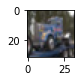

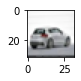

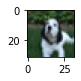

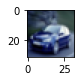

In [7]:
# Lets display some images using Matplotlib
for i in range(322,326):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()
    

PREPROCESSING THE DATA 😉

In [8]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10

# One hot coding creates new columns for each category
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


##BUILDING THE MODEL 
### Working

<img src="https://www.researchgate.net/profile/Chaudhary-Aqdus/publication/334639839/figure/fig4/AS:799323273048073@1567584927323/Convolution-Neural-Network-CNN-working-paradigm-with-input-convolution-pooling-layers.ppm"  >

#### Kernel
<img src="https://miro.medium.com/max/1010/1*jIv2CLxdXsxvx60Urc11Tw.png" >

#### Max Pooling
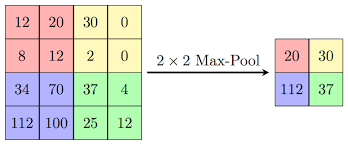

#### Categorical cross entropy 
This is actually a combination of cross entropy loss and softmax loss
<img src="https://gombru.github.io/assets/cross_entropy_loss/softmax_CE_pipeline.png" >


In [9]:


from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 506s 1s/step - loss: 1.8376 - accuracy: 0.3090 - val_loss: 1.1608 - val_accuracy: 0.5935
Epoch 2/20
391/391 [==============================] - 489s 1s/step - loss: 1.1543 - accuracy: 0.5904 - val_loss: 0.9013 - val_accuracy: 0.6802
Epoch 3/20
391/391 [==============================] - 489s 1s/step - loss: 0.9396 - accuracy: 0.6711 - val_loss: 0.8120 - val_accuracy: 0.7187
Epoch 4/20
391/391 [==============================] - 488s 1s/step - loss: 0.8189 - accuracy: 0.7151 - val_loss: 0.7529 - val_accuracy: 0.7394
Epoch 5/20
391/391 [==============================] - 488s 1s/step - loss: 0.7245 - accuracy: 0.7465 - val_loss: 0.7541 - val_accuracy: 0.7383
Epoch 6/20
391/391 [==============================] - 487s 1s/step - loss: 0.6567 - accuracy: 0.7732 - val_loss: 0.7087 - val_accuracy: 0.7548
Epoch 7/20
391/391 [==============================] - 489s 1s/step - loss: 0.5942 - accuracy: 0.7901 - val_loss: 0.6580 - val_accuracy: 0.7707

PREDICTING 🤔

In [16]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 46ms/step


In [11]:
print (predictions)

[[8.36433264e-06 1.00028035e-06 2.22901497e-02 3.69423209e-03
  7.08768845e-01 5.16072707e-03 1.74782559e-04 2.59890944e-01
  2.21609298e-06 8.78636001e-06]
 [1.34839851e-04 8.56723200e-05 2.51930412e-02 2.68057019e-01
  6.69250265e-03 5.60937345e-01 2.40225624e-02 1.13785312e-01
  5.99736464e-04 4.91936051e-04]
 [2.63635920e-05 2.16006465e-05 5.22053894e-03 5.74084138e-03
  3.74730618e-04 3.34464043e-04 9.88183796e-01 2.31091180e-05
  5.13063060e-05 2.32242000e-05]
 [1.22645872e-06 2.22339494e-07 2.23462357e-05 9.51243758e-01
  1.39027965e-04 1.11353758e-04 4.84598130e-02 1.85570730e-06
  8.54223072e-06 1.19251199e-05]
 [7.15587423e-10 9.99999285e-01 1.16016372e-18 3.96631277e-16
  8.79028732e-24 1.52293101e-18 1.81991067e-17 4.74654533e-17
  3.01506105e-07 4.06324091e-07]
 [3.93544433e-11 9.99999881e-01 4.23854474e-14 7.75082689e-12
  1.70305334e-19 3.91927484e-13 1.60852017e-12 2.62714912e-17
  5.94744609e-09 1.44346785e-07]
 [3.50902486e-03 4.23835672e-06 4.82651554e-02 6.42351747e

In [12]:
for image in predictions:
    print(np.sum(image))

1.0000001
1.0
1.0
1.0000001
1.0
1.0
1.0000001
1.0
1.0


In [13]:
 #Argmax is an operation that finds the argument that gives the maximum value from a target function
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 3 6 8]


FINAL OBJECT DETECTION 

In [14]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()